In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tqdm import tqdm  # For progress monitoring

# Add the project root directory to sys.path
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Adjust to your project's structure
sys.path.append(project_root)

from src.analysis import *

In [2]:
excess_features = ['STL_opp_pg', 'ASTPct', 'DREB', 'PF_opp', 'FTA_team', 'sentiment_4', 'PF_pg', 'DREB_PG', 'PTS_player', 'sentiment_9', 
                   'TOV_player', 'OWS', 'sentiment_7', 'FGM_PG', 'FT_PCT_PG', 'STL_opp', 'FG%_opp', 'AST_opp_pg', 'FGA_player', 'FG3A', 
                   'TS%_player', 'FTA_player', 'TOV_pg', 'REB', 'NRtg', 'FTM', 'FT%_y', 'AST_pg', 'STLPct', 'DRB%', 'FTr_player', 
                   'PF_opp_pg', 'FT_PCT', 'eFG%_player', 'FG_pg', 'PTS_PG', 'FT%_pg', 'index', 'FT_opp', 'ORB', 'DRB_opp', 'TRB_opp', 
                   'W', 'FGA_PG', '3P%_x', '3P%_pg', '3PA_opp_pg', 'eFG%.1', 'TSPct', 'FTA_opp_pg', 'DRB', 'BLK', '2PA_pg', 'TOV%.1', 
                   '2P%_opp', '2PA', 'STL', 'G_y', 'FTr_team', 'PA/G', 'BLK_team', 'MIN_PG', 'FG_PCT', '2PA_opp', 'eFG%_team', 'DBPM', 
                   '3P%_opp_pg', 'TRB_opp_pg', 'FGA_pg', 'TRB_y', 'USGPct', 'AST', 'ORB_pg', 'AST_player', 'Pace', 'FT', 'MP_pg', '3PA_opp', 
                   '2P', 'PTS', 'FT%_x', 'sentiment_11', 'AST_opp', 'SRS_wl', '3P_opp', 'Rk_pg', 'PTS_team', '3PAr_player', 'W/L%', 'L', 
                   'AST_PG', 'FG%_opp_pg', '3P%_opp', 'TOV_opp_pg', 'FTM_PG', 'BLK_player', 'sentiment_10', 'FG_PCT_PG', 'BLKPct', 
                   'FG_opp', 'PW', 'ORB_opp', 'GS', 'ORB_opp_pg', 'PS/G', 'sentiment_15', '2P_pg', 'TOV_PG', 'BLK_opp_pg', 'FTA_pg', 
                   'DRB_pg', 'FT/FGA.1', 'TRB', 'PF_PG', 'PTS_opp', 'ORB%', 'STL_player', 'FT_pg', 'PF_player', 'FG3_PCT_PG', 'PF_team', 
                   '2P_opp', 'FTA_PG', 'MIN', 'SOS', 'TRB_x', 'FT%_opp', 'ORBPct', 'TRBPct', 'FG3M', 'PL', 'FGA_opp', 'PTS_opp_pg', 'GP', 
                   'BLK_pg', 'STL_team', 'MP_opp', 'Rk_opp', 'FT_opp_pg', '3PA', 'REB_PG', 'AST_team', 'PTS_pg', 'TS%_team', 'STL_PG', 'OREB',
                   'FG3A_PG', 'FGA_opp_pg', 'TOV_team', '2P%_pg', 'TRB_pg', 'L_wl', 'MP_opp_pg', '3PAr_team', '3P_opp_pg', 'FG_opp_pg', 'TOV%', 
                   'sentiment_12', '2PA_opp_pg', 'TOV_opp', 'W_wl', 'FG%_y', 'FG%_x', 'OREB_PG', 'MOV', 'FGA_team', 'DRtg', '2P%', 'PLAYER_AGE', 
                   'BLK_opp', 'FTA_opp', 'G_pg', 'FT%_opp_pg', 'FG3M_PG', '3P', 'STL_pg', 'FT/FGA', 'FG%_pg', '2P_opp_pg', 'MP_x', 'G_opp_pg', '3PA_pg', 
                   '3P_pg', 'G_x', 'BLK_PG', 'G_opp', 'FG']

repeat_cols = ['2P%', '2P%_opp', '3P%_opp', '3P%_x', '3P%_y', 'FG3_PCT', 'AST_player', 'BLK', 'FG%_opp', 'FG%_x', 'FG%_y', 'FG_PCT', 
               'FT%_opp', 'FT%_x', 'FT%_y', 'FT_PCT', 'G_y', 'G_opp', 'G_pg', 'G_x', 'MP_y', 'MP_x', 'MP_pg', 'PA/G', 
               'PS/G', 'PTS', 'TRB', 'TRB_y', 'SRS_wl', 'STL', 'TRB_y', 'WS_x', 'WS_y', 'WS/48_y']

# ['PLAYER_FULLNAME', 'SEASON_ID', 'TEAM_ABBREVIATION_player']

In [11]:
# Function to load and preprocess data
def load_and_preprocess_data(file_path, target_column):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Separate features and target
    # X = df.drop(columns=[target_column] + excess_features + repeat_cols)
    X = df.drop(columns=[target_column] + repeat_cols)
    y = df[target_column]
    
    # Normalize features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    
    return X_normalized, y

# Function to split data
def split_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    # Split data into train and temp (test + validation)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size + val_size, random_state=random_state)
    
    # Split temp into test and validation
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + val_size), random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to train the model
def train_model(X_train, y_train, n_estimators=100, random_state=42):
    # Initialize the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    
    # Train the model with progress bar
    with tqdm(total=n_estimators, desc="Training Progress") as pbar:
        for i in range(1, n_estimators + 1):
            model.set_params(n_estimators=i)
            model.fit(X_train, y_train)
            pbar.update(1)
    
    return model

# Function to evaluate the model and show feature importance
def evaluate_model(model, X_val, y_val, feature_names):
    # Predictions and evaluation
    y_pred = model.predict(X_val)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    
    # Feature Importance
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:")
    print(importance_df)
    return importance_df    

# Main workflow
def main(file_path, target_column):
    # Load and preprocess data
    X, y = load_and_preprocess_data(file_path, target_column)
    
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    
    # Train model
    # feature_names = pd.read_csv(file_path).drop(columns=[target_column] + excess_features + repeat_cols).columns  # Extract feature names
    feature_names = pd.read_csv(file_path).drop(columns=[target_column] + repeat_cols).columns  # Extract feature names
    model = train_model(X_train, y_train)
    
    # Evaluate model
    importance_df = evaluate_model(model, X_val, y_val, feature_names)

    # Return trained model and test set for further analysis
    return model, X_test, y_test, importance_df

In [4]:
# Example usage

file_path = "/Users/cb/src/nba_mvp_ml/data/processed/by_season/fully_merged/final_stacked_data.csv"  # Update with your file path
target_column = "mvp"  # Replace with the actual target column name
model, X_test, y_test, importance_df = main(file_path, target_column)

Training Progress: 100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.14it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        51
           1       0.50      0.12      0.20         8

    accuracy                           0.86        59
   macro avg       0.69      0.55      0.56        59
weighted avg       0.83      0.86      0.83        59


Feature Importances:
           Feature  Importance
180   sentiment_14    0.080069
168    sentiment_2    0.039133
182  sentiment_avg    0.038026
174    sentiment_8    0.032885
57         WS/48_x    0.030610
..             ...         ...
46              GS    0.000000
85         FTA_opp    0.000000
178   sentiment_12    0.000000
120      FG_opp_pg    0.000000
118       G_opp_pg    0.000000

[184 rows x 2 columns]


In [5]:
results = np.array(list(model.predict(X_test) == y_test))

# Count True values
true_count = np.count_nonzero(results)

# Count False values
false_count = np.count_nonzero(~results)

print("True count:", true_count)
print("False count:", false_count)
(true_count-false_count) / true_count

True count: 53
False count: 6


0.8867924528301887

In [6]:
print(importance_df.to_string())

           Feature  Importance
180   sentiment_14    0.080069
168    sentiment_2    0.039133
182  sentiment_avg    0.038026
174    sentiment_8    0.032885
57         WS/48_x    0.030610
183             WS    0.029854
167    sentiment_1    0.029003
169    sentiment_3    0.028298
172    sentiment_6    0.026660
56            VORP    0.021932
41             BPM    0.019414
173    sentiment_7    0.018321
50             PER    0.015560
49             OWS    0.014400
44             DWS    0.012149
26         DREB_PG    0.010869
1              FGM    0.010391
113         BLK_pg    0.010258
147            SRS    0.009677
177   sentiment_11    0.009038
101         3P%_pg    0.009006
148           ORtg    0.008984
27          REB_PG    0.008534
23          FTA_PG    0.007860
175    sentiment_9    0.007727
43          DRBPct    0.007082
18       FG_PCT_PG    0.006995
21      FG3_PCT_PG    0.006982
117      Rk_opp_pg    0.006924
4             FG3A    0.006267
149           DRtg    0.006219
16      

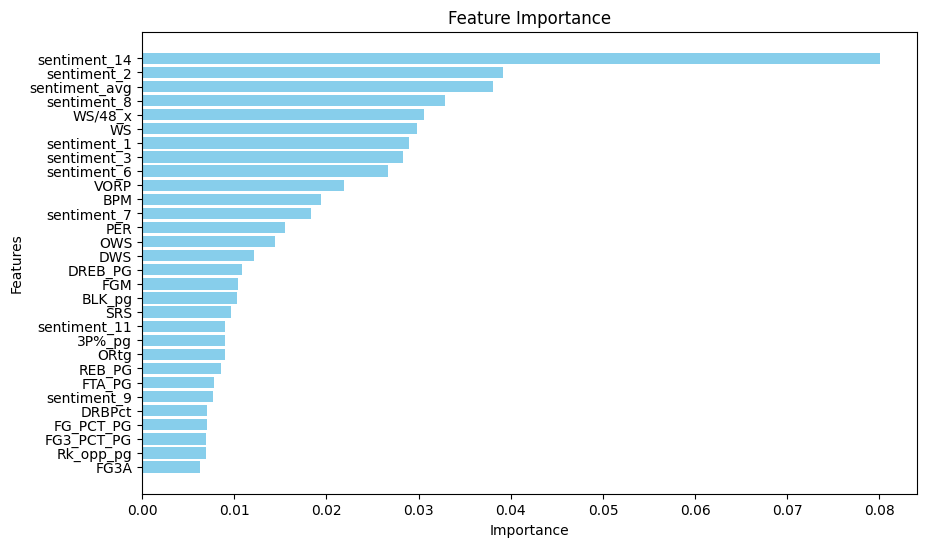

In [7]:
import matplotlib.pyplot as plt

def plot_feature_importance(feature_importance_df):
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis for top-to-bottom order
    plt.show()

plot_feature_importance(importance_df[:30])

In [8]:
# print(list(importance_df[30:]['Feature']))

In [19]:
dims = {
        'PLAYER_FULLNAME': 'Player',
        # 'eFG%_player': 'Eff. FG%',
        # 'TS%_player' : 'True Shooting%',
        'PER': 'PER',
        'WS': 'Win Shares',
        'BPM': '+/-',
        'SRS': 'SRS',
        # 'BLK': 'Blocks',
        # 'TRB': 'Rebounds',
        # 'WS/48': 'WS per 48 minutes (WS/48)',
        'PTS_opp_pg': 'Opp. PPG',
        # 'W/L%': 'Win-Loss %',
        'VORP': 'VORP',
        'Pace': 'Team Pace',
        'sentiment_8': 'Hist. Sig. (8)',
        'sentiment_2': 'Win Imp. (2)',
        'sentiment_14': "RP'ing (14)",
        'sentiment_avg': 'Sent. Avg.',
        'Pts_Won': 'MVP Pts Won'
}


# for year in list(range(1980, 2024)):
year = 2023

player_df, team_df, mvp_df = load_year(year)
add_sentiment_avg(mvp_df)
for number, player in enumerate(list(mvp_df.head()['Player'])):
    print(number+1, player)
fig = advanced_metrics_player_contribution_filtered(player_df, team_df, mvp_df.head(), dims=dims, include_non_mvp=False)
fig.write_image(f"/Users/cb/src/nba_mvp_ml/output/{year}.png", width=1400, height=1000, scale=2)
# fig

NameError: name 'add_sentiment_avg' is not defined

In [10]:
len(importance_df)

184